## The ARIMA Model

Notation: (p, d, q)
- p = AR lags
- q = MA lags
- d = Integration (number of times we need to integrate the time-series to ensure stationarity)

ARIMA(p, d, q) is an ARMA(p, q) model for a newly generated time-series which is stationary.

* For any integration we lose a single observation

### Intuition

Accounting for the non-seasonal difference between periods to establish stationarity.

## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing

In [2]:
raw_csv_data = pd.read_csv('data/Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index('date', inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Creating Returns

In [6]:
df['returns'] = df.market_value.pct_change(1) * 100

## ARIMA(1, 1, 1)

In [7]:
model_arima_111 = ARIMA(df.market_value, order = (1, 1, 1))
results_arima_111 = model_arima_111.fit()
results_arima_111.summary()
# The integration order (d) has no effect on the number of
# parameters we need to estimate.
# We are transforming the underlying data while no modeling is performed

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 15 Feb 2021   AIC                          55215.333
Time:                        18:55:45   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5654      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## Residuals of the ARIMA(1, 1, 1)

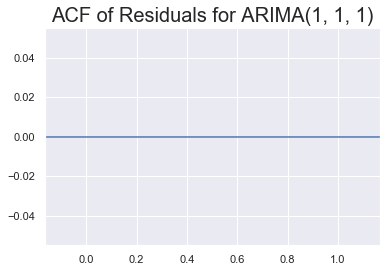

In [8]:
df['res_arima_111'] = results_arima_111.resid
sgt.plot_acf(df.res_arima_111, zero = False, lags = 40)
plt.title('ACF of Residuals for ARIMA(1, 1, 1)', size = 20)
plt.show()
# The ACF failed to compute due to the missing value at the first element

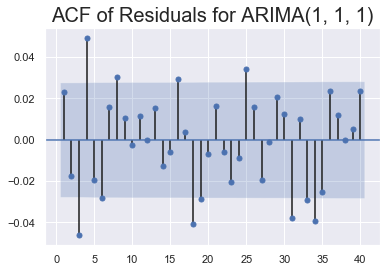

In [9]:
# Trying again without the first element
df['res_arima_111'] = results_arima_111.resid
sgt.plot_acf(df.res_arima_111[1:], zero = False, lags = 40)
plt.title('ACF of Residuals for ARIMA(1, 1, 1)', size = 20)
plt.show()